<a href="https://colab.research.google.com/github/lucasjsbarbosa/lighthouse-indicium/blob/main/Lighthouse_Indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
import pickle
from scipy import stats
from tensorflow.keras import regularizers
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## EDA and Visualization

In [ ]:
df = pd.read_csv('teste_indicium_precificacao.csv')

In [ ]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
df.shape

(48894, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [ ]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
numeric_df = df.select_dtypes(include='number')
correlacao = numeric_df.corr()

<Axes: >

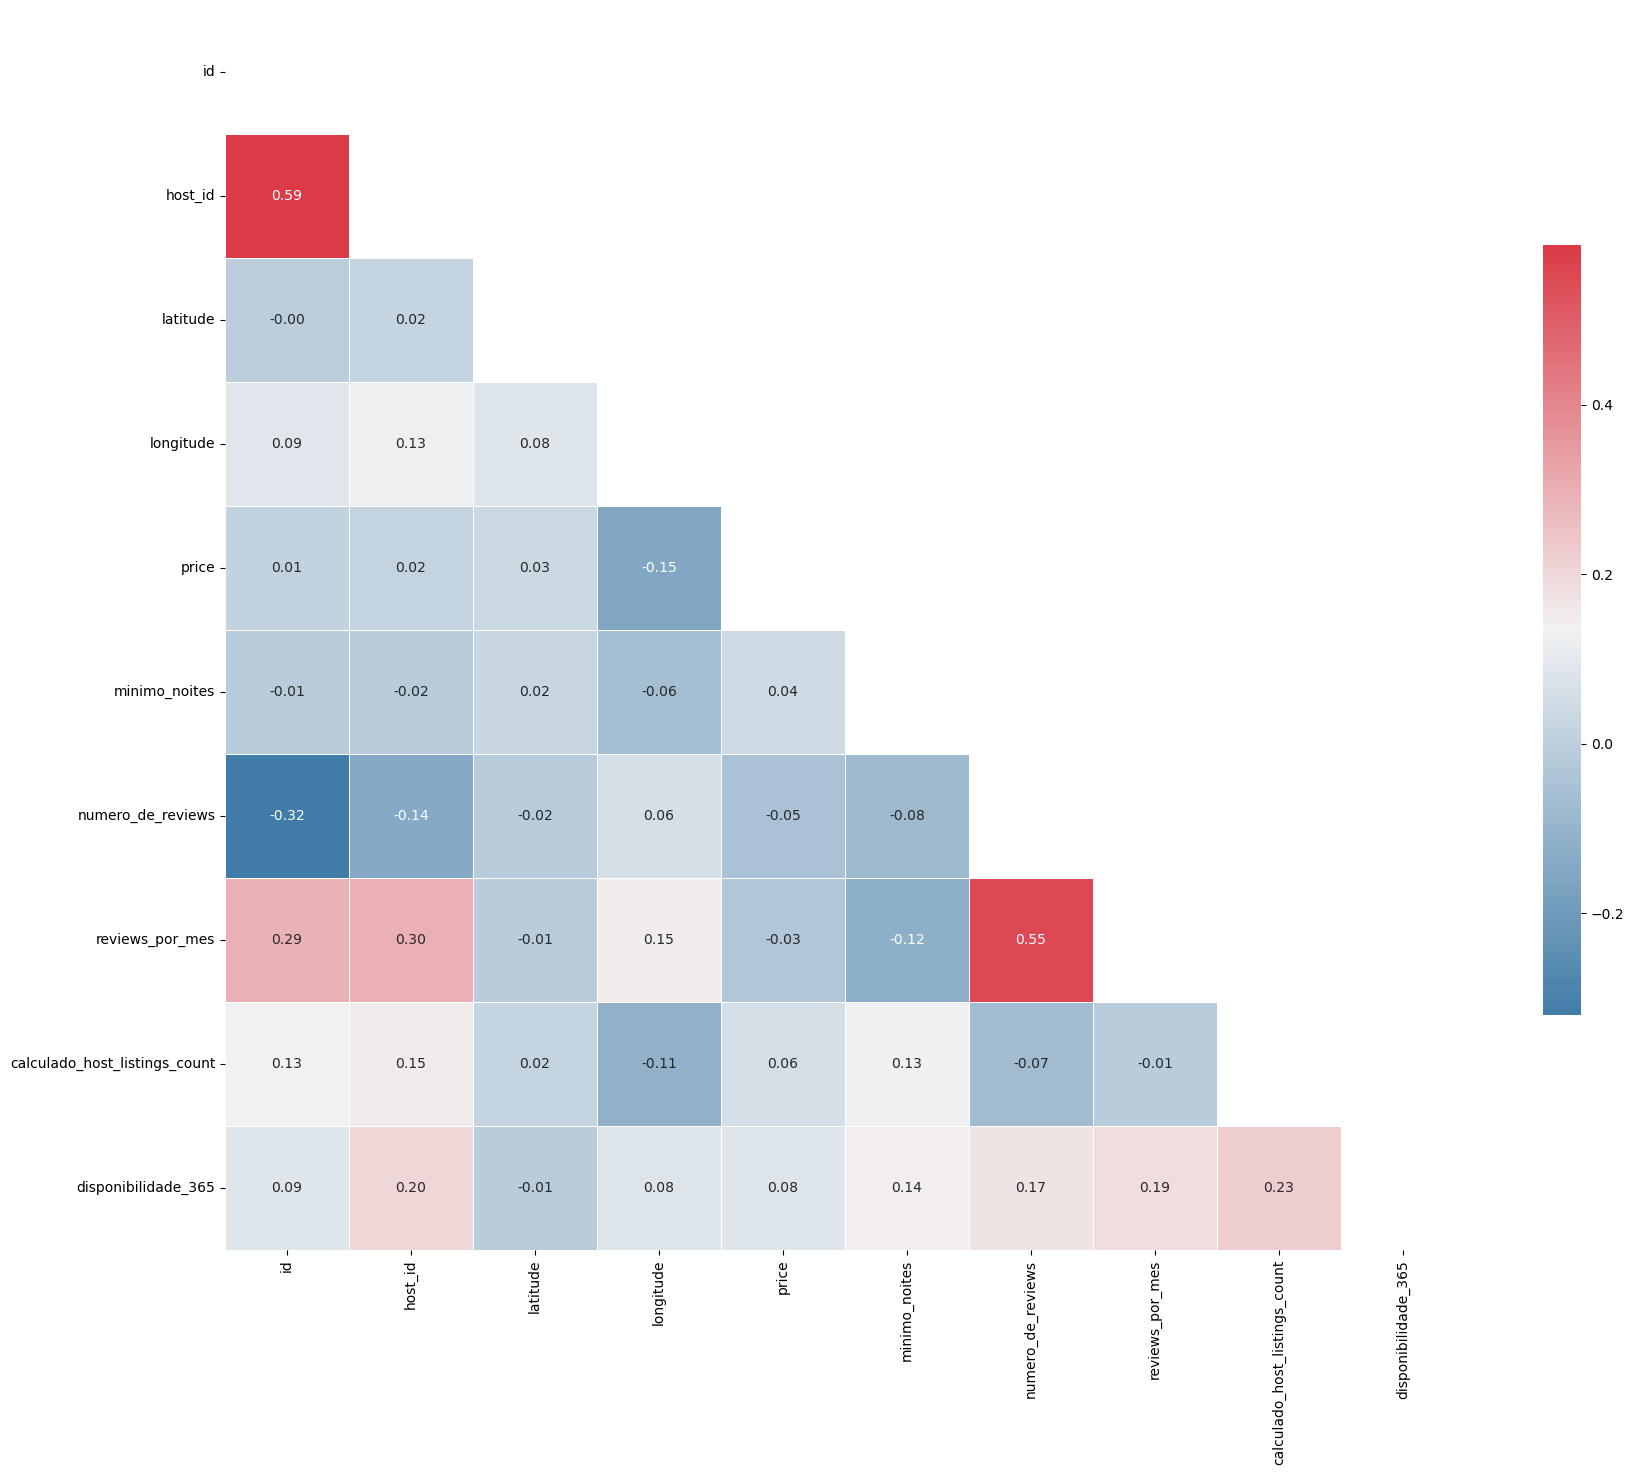

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap=cmap, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

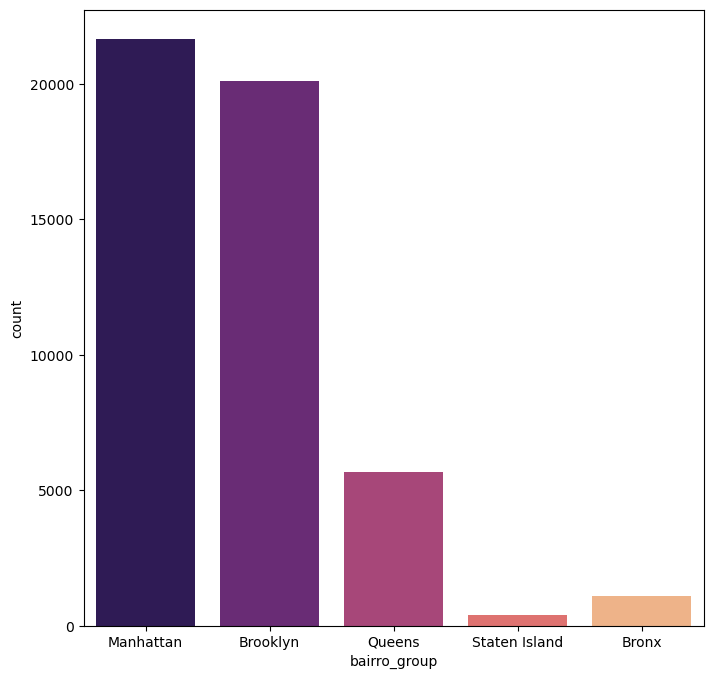

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['bairro_group'], palette = 'magma');

In [ ]:
df = df.dropna()

C:\Users\pc\AppData\Local\Temp\ipykernel_17748\733135884.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dados_para_plotagem = pd.concat([dados_para_plotagem, pd.DataFrame({'Palavra-chave': [palavra_chave, 'Sem ' + palavra_chave], 'Preço': [preco_com_palavra_chave, preco_sem_palavra_chave]})])


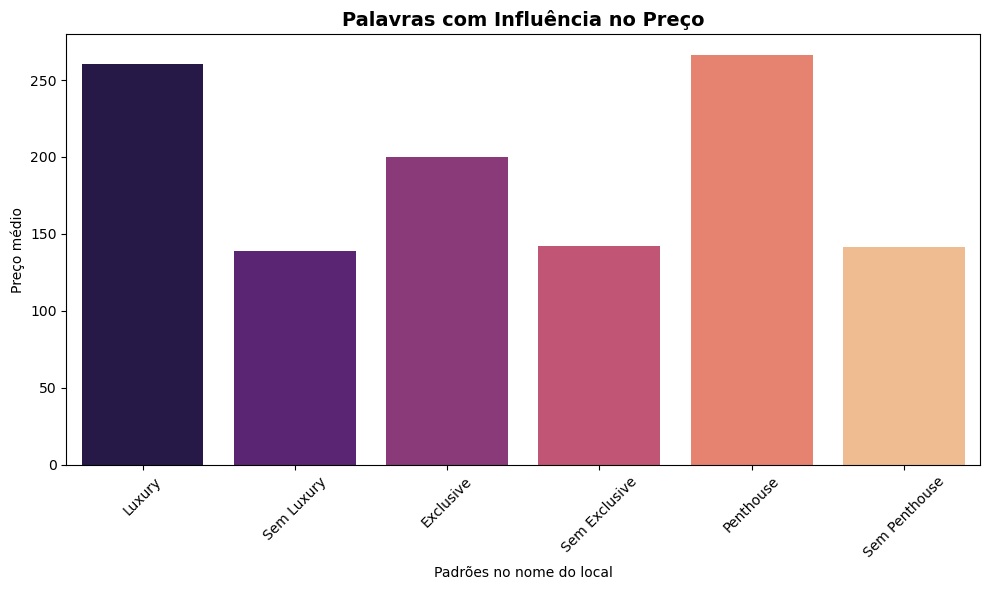

In [ ]:
palavras_chave = ['Luxury', 'Exclusive', 'Penthouse']

for palavra_chave in palavras_chave:
    df[palavra_chave] = df['nome'].str.contains(palavra_chave)

dados_para_plotagem = pd.DataFrame(columns=['Palavra-chave', 'Preço'])
for palavra_chave in palavras_chave:
    preco_com_palavra_chave = df[df[palavra_chave]]['price'].mean()
    preco_sem_palavra_chave = df[~df[palavra_chave]]['price'].mean()
    dados_para_plotagem = pd.concat([dados_para_plotagem, pd.DataFrame({'Palavra-chave': [palavra_chave, 'Sem ' + palavra_chave], 'Preço': [preco_com_palavra_chave, preco_sem_palavra_chave]})])

plt.figure(figsize=(10, 6))
sns.barplot(x='Palavra-chave', y='Preço', data=dados_para_plotagem, palette='magma')
plt.xlabel('Padrões no nome do local')
plt.ylabel('Preço médio')
plt.title('Palavras com Influência no Preço',  fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

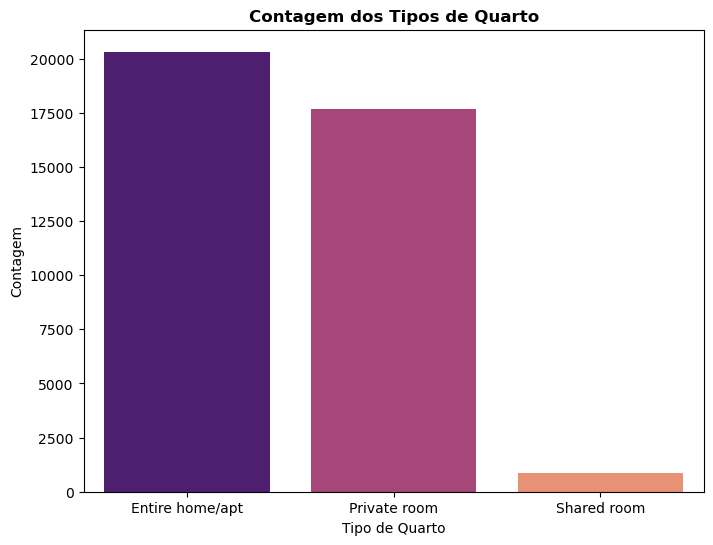

In [ ]:
quarto_tipo = df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=quarto_tipo.index, y=quarto_tipo.values, palette='magma')
plt.title('Contagem dos Tipos de Quarto',  fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.show()

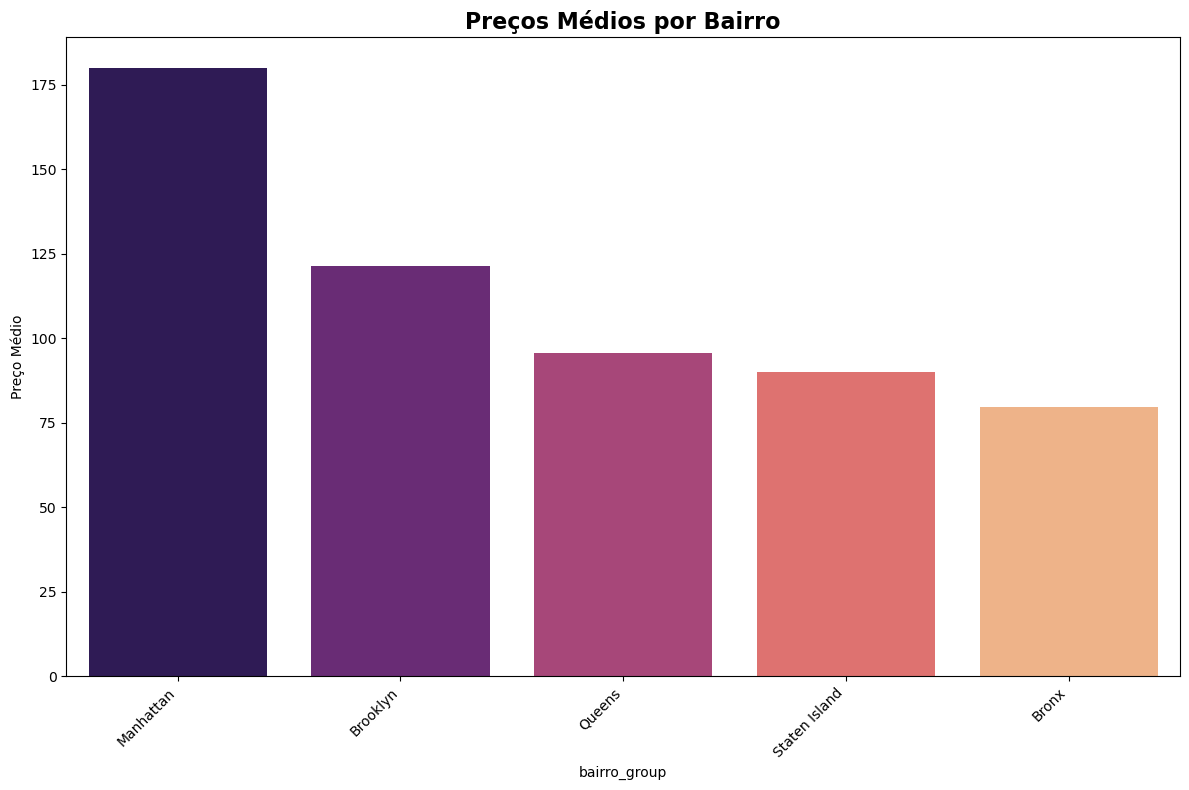

In [ ]:
preco_medio_bairro = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=preco_medio_bairro.index, y=preco_medio_bairro.values, palette='magma')
plt.title('Preços Médios por Bairro', fontsize=16, fontweight='bold')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Disponibilidade Anual por Bairro')

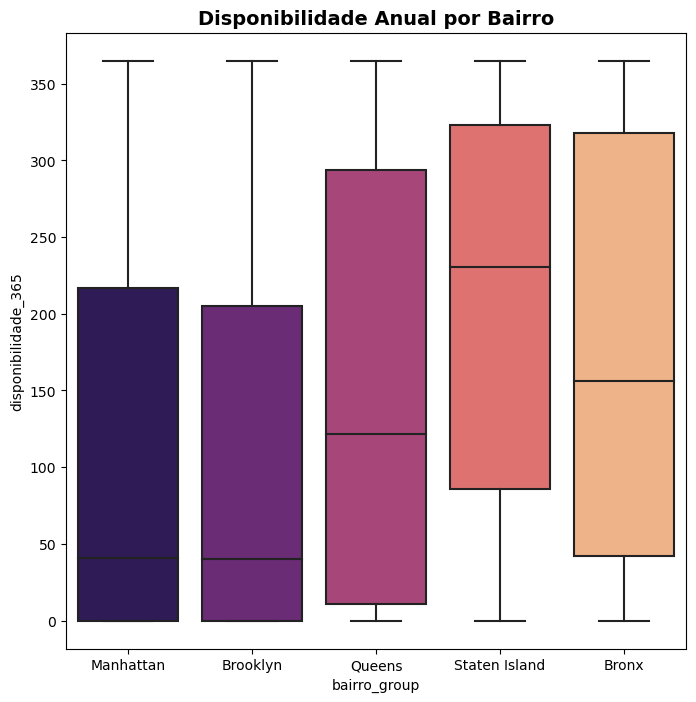

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df, x='bairro_group',y='disponibilidade_365',palette='magma')
ax.set_title('Disponibilidade Anual por Bairro', fontsize=14, fontweight='bold')


In [ ]:
correlacao = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

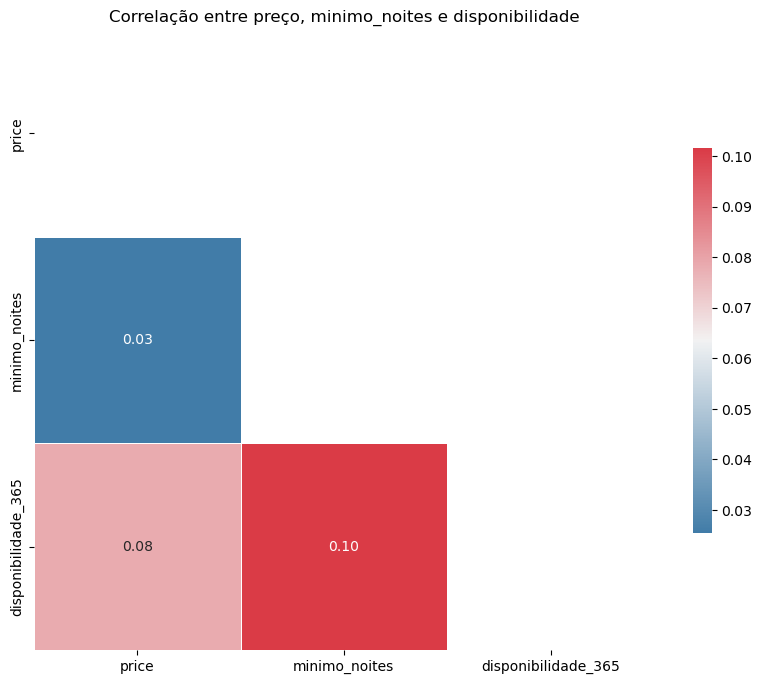

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap=cmap, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlação entre preço, minimo_noites e disponibilidade")
plt.show()

## Teste de Hipótese

In [ ]:

# Filtrar os dados para incluir apenas apartamentos inteiros (Entire home/apt) em Manhattan e Brooklyn
df_entire_home_manhattan = df[(df['bairro_group'] == 'Manhattan') & (df['room_type'] == 'Entire home/apt')]
df_entire_home_brooklyn = df[(df['bairro_group'] == 'Brooklyn') & (df['room_type'] == 'Entire home/apt')]

# Separar os preços de aluguel para Manhattan e Brooklyn
prices_manhattan = df_entire_home_manhattan['price']
prices_brooklyn = df_entire_home_brooklyn['price']

# Realizar o teste t de amostras independentes
t_stat, p_value = stats.ttest_ind(prices_manhattan, prices_brooklyn, equal_var=False)

# Definir o nível de significância
alpha = 0.05

# Interpretar os resultados
print("Teste t Estatística:", t_stat)
print("Valor-p:", p_value)

if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências estatísticas para suportar a hipótese alternativa.")
else:
    print("Não podemos rejeitar a hipótese nula. Não há evidências estatísticas para suportar a hipótese alternativa.")


Teste t Estatística: 17.421970756714938
Valor-p: 1.9952909416543074e-67
Rejeitamos a hipótese nula. Há evidências estatísticas para suportar a hipótese alternativa.


## Pré-Processing

In [ ]:
df.drop(['ultima_review', 'reviews_por_mes', 'id', 'nome', 'host_id', 'host_name'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['bairro_group', 'bairro', 'room_type'])
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

In [ ]:
training_columns = df.columns.tolist()

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, Nadam
from sklearn.metrics import r2_score

## Feature Selection e Normalização

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = SelectFromModel(estimator=clf)
X_selected = selector.fit_transform(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[ 0.66374462,  0.26488583, -0.28002434, ..., -0.05330706,
        -0.19922717, -1.0480896 ],
       [-0.30971895, -0.76546487,  0.46757434, ..., -0.05330706,
        -0.19922717, -1.0480896 ],
       [-0.1673274 , -0.16087538, -0.28002434, ..., -0.05330706,
        -0.19922717, -1.0480896 ],
       ...,
       [ 0.41642341,  1.28174409, -0.28002434, ..., -0.05330706,
        -0.19922717, -1.0480896 ],
       [ 0.84705328, -0.09833903, -0.22251675, ..., -0.05330706,
        -0.19922717,  0.9541169 ],
       [ 0.76521906,  0.8926052 , -0.22251675, ..., -0.05330706,
        -0.19922717, -1.0480896 ]])

## Modelo Redes Neurais

In [ ]:
modelo = Sequential()
modelo.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(20, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(20, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(1, activation='linear'))

In [ ]:
otimizador = Adam()

In [ ]:
modelo.compile (loss='mean_squared_error', optimizer = otimizador, metrics = ['mae', 'mse'])

In [ ]:
historico = modelo.fit(X_train, y_train, epochs=2000, batch_size=15000, validation_data=(X_test, y_test))

Epoch 1/2000


3/3 [==============================] - 1s 99ms/step - loss: 60630.3984 - mae: 142.5789 - mse: 60630.3984 - val_loss: 52796.5859 - val_mae: 141.3146 - val_mse: 52796.5859
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 60625.4766 - mae: 142.5621 - mse: 60625.4766 - val_loss: 52791.2422 - val_mae: 141.2965 - val_mse: 52791.2422
Epoch 3/2000
3/3 [==============================] - 0s 20ms/step - loss: 60619.9297 - mae: 142.5436 - mse: 60619.9297 - val_loss: 52785.2422 - val_mae: 141.2764 - val_mse: 52785.2422
Epoch 4/2000
3/3 [==============================] - 0s 18ms/step - loss: 60613.7266 - mae: 142.5231 - mse: 60613.7266 - val_loss: 52778.4609 - val_mae: 141.2538 - val_mse: 52778.4609
Epoch 5/2000
3/3 [==============================] - 0s 19ms/step - loss: 60606.6797 - mae: 142.4999 - mse: 60606.6797 - val_loss: 52770.6602 - val_mae: 141.2280 - val_mse: 52770.6602
Epoch 6/2000
3/3 [==============================] - 0s 19ms/step - loss: 60598.5664

243/243 [==============================] - 0s 818us/step


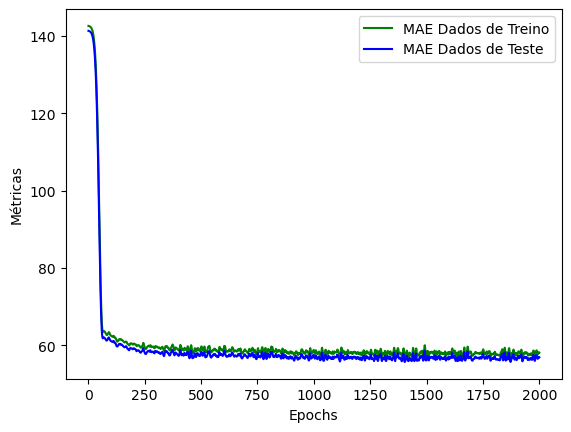

R² Treino: 0.15306067850701266
R² Teste: 0.16164189287487762
MAE Treino 58.144893646240234
MAE Teste 56.93294143676758
MSE Treino 34134.8671875
MSE Teste 27520.607421875


In [ ]:
mae_train = historico.history['mae']
mae_test = historico.history['val_mae']
mse_train = historico.history['mse']
mse_test = historico.history['val_mse']

y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

epochs = range(1, len(mae_train) + 1)

plt.plot(epochs, mae_train, '-g', label='MAE Dados de Treino')
plt.plot(epochs, mae_test, '-b', label='MAE Dados de Teste')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Métricas')
plt.show()

ultimo_mae_train = mae_train[-1]
ultimo_mae_test = mae_test[-1]
ultimo_mse_train = mse_train[-1]
ultimo_mse_test = mse_test[-1]

print("R² Treino:", r2_train)
print("R² Teste:", r2_test)
print('MAE Treino',ultimo_mae_train)
print('MAE Teste', ultimo_mae_test)
print('MSE Treino', ultimo_mse_train)
print('MSE Teste', ultimo_mse_test)

## Salvando pkl e H5

In [ ]:
modelo.save('modelo_redes_neurais.h5')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('selector.pkl', 'wb') as f:
    pickle.dump(selector, f)
with open('training_columns.pkl', 'wb') as f:
    pickle.dump(training_columns, f)

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Modelos de Regressão Scikit-Learn

### Regressão Linear Simples

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

### Regressão Ridge L2

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

### Regressão Lasso L1

In [ ]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

### Regressão ElasticNet

In [ ]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Você pode ajustar alpha e l1_ratio conforme necessário
elastic_net.fit(X_train, y_train)
elastic_pred = elastic_net.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_mae = mean_absolute_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

### Regressão Polinomial

In [ ]:
poly_features = PolynomialFeatures(degree=2)  # Grau do polinômio
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_pred = poly_reg.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)


### SVR (Support Vector Regression)

In [ ]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

### Árvore de Decisão para Regressão

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

## Comparação de Resultados

In [ ]:
print("Regressão Linear:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R²:", linear_r2)
print()

print("Regressão Ridge:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R²:", ridge_r2)
print()

print("Regressão Lasso:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R²:", lasso_r2)
print()

print("Regressão ElasticNet:")
print("MSE:", elastic_mse)
print("MAE:", elastic_mae)
print("R²:", elastic_r2)
print()

print("Regressão Polinomial:")
print("MSE:", poly_mse)
print("MAE:", poly_mae)
print("R²:", poly_r2)
print()

print("SVR:")
print("MSE:", svr_mse)
print("MAE:", svr_mae)
print("R²:", svr_r2)
print()

print("Árvore de Decisão para Regressão:")
print("MSE:", tree_mse)
print("MAE:", tree_mae)
print("R²:", tree_r2)
print()

print("Redes Neurais Regressão:")
print('MSE Teste', ultimo_mse_test)
print('MAE Teste', ultimo_mae_test)
print("R² Teste:", r2_test)
print()


Regressão Linear:
MSE: 28147.463329636186
MAE: 60.727006570129944
R²: 0.14254613884780276

Regressão Ridge:
MSE: 28147.45722552003
MAE: 60.72667582336667
R²: 0.14254632479699136

Regressão Lasso:
MSE: 28149.72983962745
MAE: 60.284389218081074
R²: 0.1424770943402892

Regressão ElasticNet:
MSE: 28576.5104699026
MAE: 61.04921049292403
R²: 0.12947611108972767

Regressão Polinomial:
MSE: 30139.67490735896
MAE: 59.415292152235764
R²: 0.0818575613534348

SVR:
MSE: 29151.053407094983
MAE: 51.38285377106233
R²: 0.11197385683242722

Árvore de Decisão para Regressão:
MSE: 55288.13549716641
MAE: 75.63008758371973
R²: -0.6842379259106026

Redes Neurais Regressão:
MSE Teste 27520.607421875
MAE Teste 56.93294143676758
R² Teste: 0.16164189287487762



## Aplicando Modelo Escolhido aos Dados

In [ ]:
novo_dado = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
novo_dado_df = pd.DataFrame([novo_dado])

In [ ]:
novo_dado_df = pd.get_dummies(novo_dado_df)

In [ ]:
novo_dado_df = novo_dado_df.reindex(columns=training_columns, fill_value=0)

In [ ]:
if 'price' in novo_dado_df.columns:
    novo_dado_df.drop('price', axis=1, inplace=True)

In [ ]:
novo_dado_scaled = scaler.transform(novo_dado_df)
novo_dado_selected = selector.transform(novo_dado_scaled)

In [ ]:
predicao = modelo.predict(novo_dado_selected)
print("Predição de preço:", predicao[0][0])

1/1 [==============================] - 0s 21ms/step
Predição de preço: 440.4905
